In [1]:
import phoebe
from phoebe import u # units
import numpy as np
# Mac users may need to turn multi-processing off
#phoebe.multiprocessing_off() 
logger = phoebe.logger('error')

In [2]:
b = phoebe.load('synthetic/optimizers_before_exercise.bundle')

/Users/bertpablo/Dropbox/phoebe-stuff/workshop_2020_tutorials/devel/lib/python3.9/site-packages/phoebe/parameters/parameters.py:10236: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._value = np.array(value)


Exercise: Combine both light and rv curves to achieve a better fit, primarily within the eclipse. Hint: It's often better to fit a small number of parameters first. 

In [3]:
#add rv back 
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: binary, primary, secondary>

In [4]:

fit_params = ['t0_supconj@binary', 'teffratio@binary', 'asini@binary', 'incl@binary']
b.set_value('fit_parameters', fit_params)

In [5]:
b.run_solver('nm_solver', solution='nm_solution', overwrite=True)

100%|██████████| 20/20 [04:53<00:00, 14.68s/it]


<ParameterSet: 12 parameters | qualifiers: success, adopt_distributions, comments, adopt_parameters, adopt_values, fitted_twigs, initial_values, fitted_values, fitted_units, message, niter, fitted_uniqueids>

In [6]:
print(b.adopt_solution('nm_solution', trial_run=True))


ParameterSet: 4 parameters
   t0_supconj@binary@orbit@com...: 1.232595109297582 d
   teffratio@binary@orbit@comp...: 0.9387696344452661
     asini@binary@orbit@component: 7.549611063758211 solRad
      incl@binary@orbit@component: 83.59289981559021 deg


In [7]:


b.run_compute('nm_fit', sample_from='nm_solution', sample_num=1)

100%|██████████| 225/225 [00:28<00:00,  7.87it/s]


<ParameterSet: 13 parameters | kinds: rv, lc>

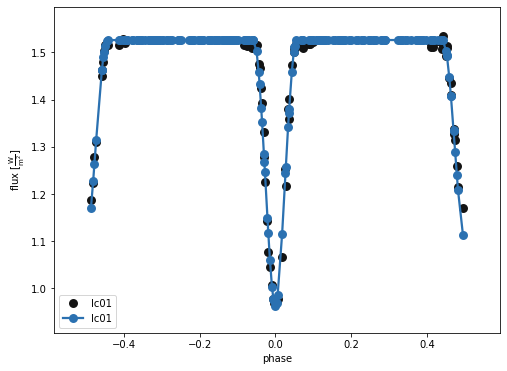

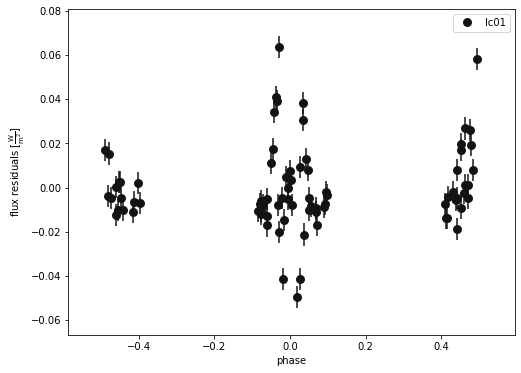

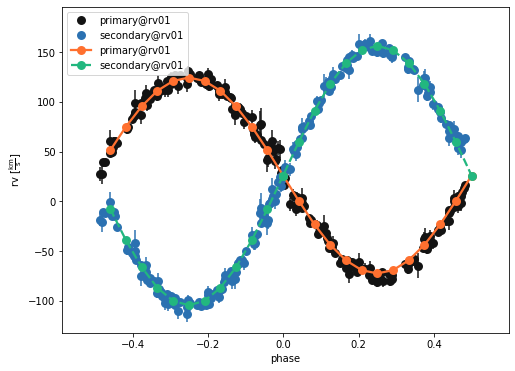

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [8]:

b.plot(kind='lc', x='phases', show=True, legend=True, marker = 'o')
b.plot(kind='lc', x='phases', y='residuals', show=True, legend=True, marker = 'o')
b.plot(kind='rv', x='phases', show=True, legend=True, marker = 'o')

In [9]:
b.adopt_solution('nm_solution')

<ParameterSet: 25 parameters | contexts: dataset, component>

In [10]:
#Different set of parameters
fit_params = ['teffratio@binary', 'requiv@primary', 'requivratio@binary']
b.set_value('fit_parameters', fit_params)

In [11]:
b.run_solver('nm_solver', solution='nm_solution', overwrite=True)

100%|██████████| 20/20 [06:28<00:00, 19.44s/it]


<ParameterSet: 12 parameters | qualifiers: success, adopt_distributions, comments, adopt_parameters, adopt_values, fitted_twigs, initial_values, fitted_values, fitted_units, message, niter, fitted_uniqueids>

In [12]:
print(b.adopt_solution('nm_solution', trial_run=True))


ParameterSet: 3 parameters
   teffratio@binary@orbit@comp...: 0.9274807446005815
    requiv@primary@star@component: 1.334273367718833 solRad
   requivratio@binary@orbit@co...: 0.9912393075862436


In [13]:
#%%timeit -r 1 -n 1

b.run_compute('nm_fit', sample_from='nm_solution', sample_num=1)

100%|██████████| 225/225 [00:04<00:00, 52.08it/s]


<ParameterSet: 13 parameters | kinds: rv, lc>

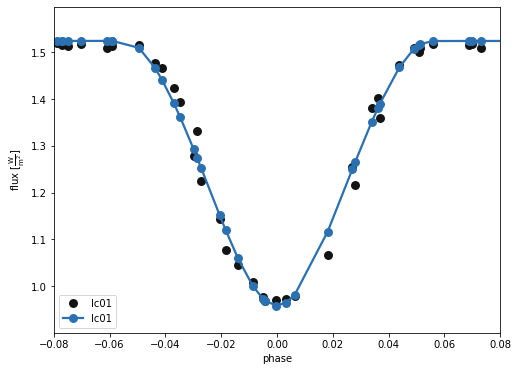

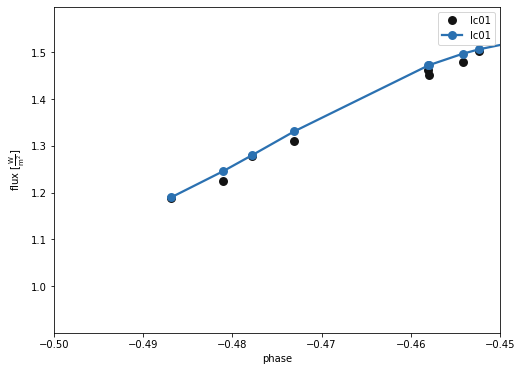

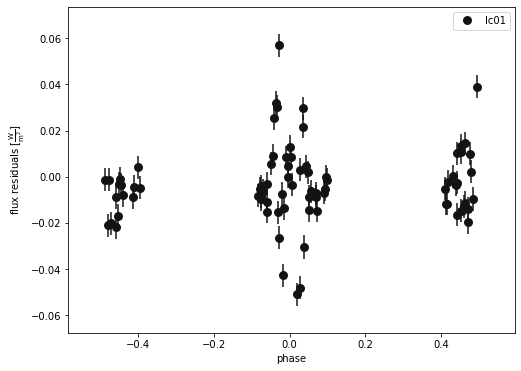

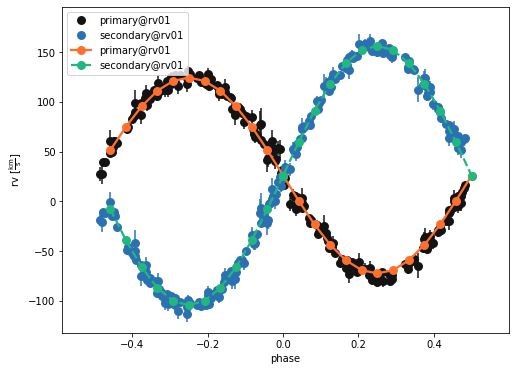

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [14]:

b.plot(kind='lc', x='phases', xlim=[-0.08,0.08], show=True, legend=True, marker = 'o')
b.plot(kind='lc', x='phases', xlim=[-0.5,-0.45], show=True, legend=True, marker = 'o')
b.plot(kind='lc', x='phases', y='residuals', show=True, legend=True, marker = 'o')
b.plot(kind='rv', x='phases', show=True, legend=True, marker = 'o')

In [15]:
b.adopt_solution('nm_solution')

<ParameterSet: 8 parameters | kinds: orbit, star>

In [16]:
b.save('synthetic/after_optimizers.bundle')

'synthetic/after_optimizers.bundle'